In [5]:
def varience(y):
    length = len(y)
    if length == 0:
        return 0
    else:
        mean = sum(y) / length
        v = sum((y - mean) ** 2) / length
        return v

def split_dataset(X, node_indices, feature):
    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)

    return left_indices, right_indices

def compute_information_gain(X, y, node_indices, feature):
    # Split dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)

    # Some useful variables
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    # You need to return the following variables correctly
    information_gain = 0

    if(len(node_indices) != 0):
        w_left = len(left_indices) / len(node_indices)
        w_right = len(right_indices) / len(node_indices)
        information_gain = varience(y_node) - ((w_left * varience(y_left)) + (w_right * varience(y_right)))
        return information_gain
    else:
        return information_gain

def get_best_split(X, y, node_indices):
    # Some useful variables
    num_features = X.shape[1]

    # You need to return the following variables correctly
    best_feature = -1
    max_info_gain = 0

    for i in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, i)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = i

    return best_feature

def build_tree_recursive(X, y, node_indices, max_depth, current_depth):

    # Maximum depth reached or pure node - stop splitting
    if((current_depth == max_depth) or (len(node_indices)) <= 15):
        if(len(node_indices) != 0):
            avg_value = sum(y[node_indices])/len(node_indices)  # Calculate average value at leaf node.
            avg_value = int(avg_value)
            return {'is_leaf': True, 'avg_value': avg_value}

    else:
        print('-', end = ' ')
        # Otherwise, get best split and split the data
        # Get the best feature and threshold at this node
        best_feature = get_best_split(X, y, node_indices)

        # Split the dataset at the best feature
        left_indices, right_indices = split_dataset(X, node_indices, best_feature)

        # continue splitting the left and the right child. Increment current depth
        left_child = build_tree_recursive(X, y, left_indices, max_depth, current_depth + 1)
        right_child = build_tree_recursive(X, y, right_indices, max_depth, current_depth + 1)

        return {'is_leaf': False, 'feature': best_feature, 'left_child': left_child, 'right_child': right_child}

def build_tree(X, y, max_depth):
    return build_tree_recursive(X, y, list(range(len(X))), max_depth, 0)


def predict_tree(tree, sample):
    if tree['is_leaf']:  # Leaf node
        return tree['avg_value']
    else:  # Non-leaf node
        feature_index = tree['feature']
        if sample[feature_index] == 1:
            return predict_tree(tree['left_child'], sample)  # Move to left child
        else:
            return predict_tree(tree['right_child'], sample)  # Move to right child

def predict_tree_on_test_set(tree, X):
    predictions = []
    for sample in X:
        prediction = predict_tree(tree, sample)
        predictions.append(prediction)
    return predictions




def train_test_split_manual(X, y, test_size):
    # Compute the number of items to include in the test set
    num_test_items = int(len(X) * test_size)

    np.random.seed(0)

    # Randomly choose indices for the test set
    test_indices = np.random.choice(len(X), size=num_test_items, replace=False)

    # All other indices are part of the training set
    train_indices = np.setdiff1d(np.arange(len(X)), test_indices)

    # Split the data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test



In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Twitter_Facebook_data.csv')

# Assuming your dataset is stored in a DataFrame named df
# Convert "Date Sampled" column to datetime and extract month
data['Month'] = pd.to_datetime(data['Date Sampled']).dt.month

data.drop(columns=['Date Sampled'], inplace=True)

data = data[data['Agency'].isin(['311', 'ACS', 'CAU', 'Change by Us', 'City Charter', 'City Store', 'Culture', 'DCA', 'DEP',\
                                'DFTA (aging)', 'DFTA', 'DHS', 'DHS (Homeless Service)', 'DOB', 'DOB: Cool Roofs',\
                                'DOB: UrbanCanvas', 'DOE', 'NYC Schools', 'NYC TeachingFellows', 'I teach NYC', 'NYC Health',\
                                'Eating Healthy NYC', 'NYCKnows', 'NYCQuites', 'DOI','NYC IT & Telecomm',\
                                 'DOT (Department of Transportaion)', 'JanetteSadikKhan (Not Available)',\
                                'DOT (Department of Transportaion)', 'You the Man NYC (not available)', 'NYC Parks',\
                                'Pearl_Squirrel (not available)', 'DYCD', 'NYC zerowaste',  'Applied Sciences NYC',\
                                'EDC (New York City Economic Development Corporation)', 'energyNYC', 'FDNY (Fire Department)',\
                                'FUND', 'HHC', 'HDP', 'HIA', 'HRA (Human Resource Administration)', 'NYC Dad', 'NYC LatinMedia',\
                                'LPC', 'Materials for the Arts', 'MOIA', "NYC Mayor's Office of Immigrant Affairs",\
                                'MOME', 'MOPD', 'NYCgo', 'nycshop', 'NYCgo.au', 'NYCgo.br', 'NYCgo.ca','NYCgo.de',\
                                'NYCgo.es', 'NYCgo.fr', 'NYCgo.it', 'NYCgo.uk', 'NYC Digital', 'NYC Gov','NYC Mayors Cup',\
                                'NYC Waterfront', 'NYCCFB', 'NYC Votes', 'NYCGLOBAL', 'NYCHA', 'NYCService',\
                                'OCDV','YouCanTooNYC', 'NYC Recycles2', \
                                'SBS (Small Business Service)', 'SBS', 'SBS - Workforce1', 'SBS - Workforce1', 'VAC',\
                                'Vets'])]

#print(data)

X = data[['Agency', 'Platform', 'Month']]

y = data[['Likes/Followers/Visits/Downloads']]
y = y.values

# y = y[0: 2500, : ]

y = y.reshape(len(y))
# print(y)

one_hot_encoded_data = pd.get_dummies(X, columns = ['Agency', 'Platform', 'Month'], dtype = int)

one_hot_encoded_data = one_hot_encoded_data.values

# #one_hot_encoded_data = one_hot_encoded_data[0: 2500, :]


print(one_hot_encoded_data)

# #X = X.values
# print(one_hot_encoded_data)

c = one_hot_encoded_data.shape[1]
print(c)

X_train2, X_test2, y_train2, y_test2 = train_test_split_manual(one_hot_encoded_data, y, test_size=0.2)



#print(X_train, len(X_train))
#print(y_train, len(y_train))

# Train the tree
max_depth = 7 # Set your desired max depth
tree = build_tree(X_train2, y_train2, max_depth)

#print(tree)

# Make predictions on test set
predictions = predict_tree_on_test_set(tree, X_test2)

# Now you have predictions for your test dataset
# You can further evaluate the predictions as needed

#print(predictions)



[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]
91
- - - - - - - - - - - - - - - - - - 

In [7]:
#print('Actual like:')
#print(y_test, type(y_test))

predictions = np.array(predictions)

#print('Predicted like:')
#print(predictions, type(predictions))

error1 = np.mean((y_test2 - predictions)**2)
error1 = pow(error1, 0.5)
print('The root mean squared error for Decision Tree is:', error1)


denominator = np.sum((y_test2 - np.mean(predictions))**2)
numerator = np.sum((y_test2 - predictions)**2)
val1 = 1 - (numerator / denominator)
print('The R2 score for Decision Tree is:', val1)



The root mean squared error for Decision Tree is: 4927.188790331218
The R2 score for Decision Tree is: 0.8089764600439032


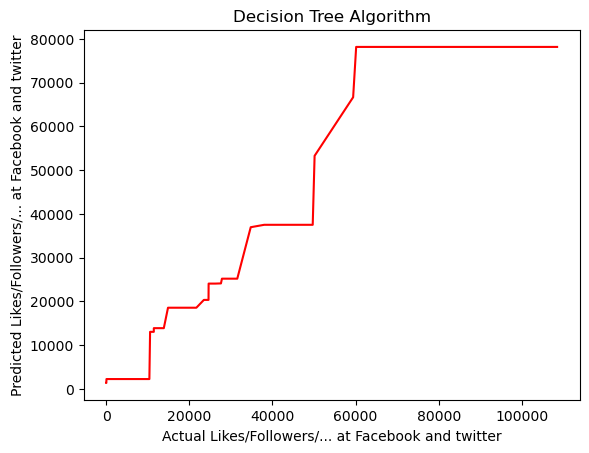

In [8]:
#print(np.shape(y_test))
#print(np.shape(predictions))

plt.plot(sorted(y_test2), sorted(predictions), color='r')
plt.xlabel('Actual Likes/Followers/... at Facebook and twitter')
plt.ylabel('Predicted Likes/Followers/... at Facebook and twitter')
plt.title('Decision Tree Algorithm')
plt.show()



In [10]:
def build_forest(X, y, n_trees, max_depth):
    forest = []
    for _ in range(n_trees):
        # Create a bootstrap sample
        indices = np.random.choice(len(X), size= int(len(X) * 0.8), replace=True)
        X_sample, y_sample = X[indices], y[indices]

        # Build a tree on the bootstrap sample
        tree = build_tree(X_sample, y_sample, max_depth)
        forest.append(tree)
    return forest

def predict_forest(forest, sample):
    predictions = [predict_tree(tree, sample) for tree in forest]
    return np.mean(predictions)

def predict_forest_on_test_set(forest, X):
    predictions = [predict_forest(forest, sample) for sample in X]
    return predictions



In [11]:

# Train the forest
n_trees = 100  # Set your desired number of trees
max_depth = 7  # Set your desired max depth
forest = build_forest(X_train2, y_train2, n_trees, max_depth)

# Make predictions on test set
predictions1 = predict_forest_on_test_set(forest, X_test2)

# Now you have predictions for your test dataset
# You can further evaluate the predictions as needed

print('')

# Calculate the mean squared error
error2 = np.mean((y_test2 - predictions1)**2)
error2 = pow(error2, 0.5)
print('The root mean squared error for Random Forest is:', error2)

# Calculate the R2 score
val2 = 1 - (np.sum((y_test2 - predictions1)**2) / np.sum((y_test2 - np.mean(y_test2))**2))
print('The R2 score for Random Forest is:', val2)



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

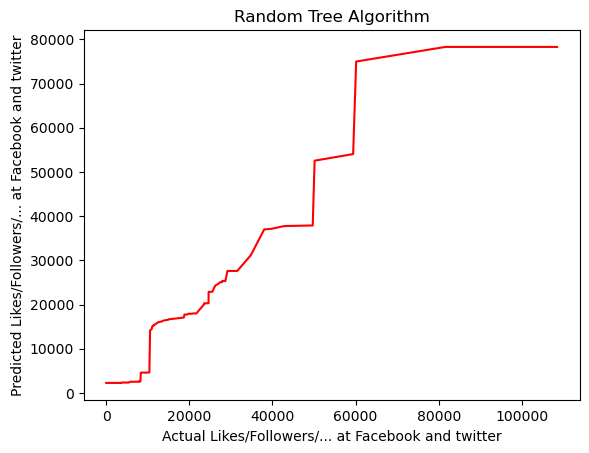

In [12]:
#print(np.shape(y_test))
#print(np.shape(predictions))

plt.plot(sorted(y_test2), sorted(predictions1), color='r')
plt.xlabel('Actual Likes/Followers/... at Facebook and twitter')
plt.ylabel('Predicted Likes/Followers/... at Facebook and twitter')
plt.title('Random Tree Algorithm')
plt.show()
